# Dataset A

In [1]:
import pandas as pd
import numpy as np

#load in the data

dataframeA = pd.read_csv('../6. Dataset PCA/MeterA_pca_2.csv')
#display(dataframeA.head())
dataframeA.head()

dataframeA = dataframeA.drop('Unnamed: 0', axis=1)

# yLbl is Class Attruibute labels

yLbl = dataframeA[['Class Attruibute']]

#featuresVector
dataframeA

,PC1,PC2,Class Attruibute
0,3.260141,-2.019053,1
1,2.522897,-1.183668,1
2,1.417243,-1.047656,1
3,0.170745,-1.351670,1
4,-0.003489,-1.337765,1
...,...,...,...
78,-0.939126,2.472891,2
79,-0.924759,2.613474,2
80,-1.578888,2.270228,2
81,-1.168676,1.980522,2


In [2]:
dataframeA['Class Attruibute'] = dataframeA['Class Attruibute'].replace([1],'Healthy')
dataframeA['Class Attruibute'] = dataframeA['Class Attruibute'].replace([2],'Installation effects')
dataframeA

,PC1,PC2,Class Attruibute
0,3.260141,-2.019053,Healthy
1,2.522897,-1.183668,Healthy
2,1.417243,-1.047656,Healthy
3,0.170745,-1.351670,Healthy
4,-0.003489,-1.337765,Healthy
...,...,...,...
78,-0.939126,2.472891,Installation effects
79,-0.924759,2.613474,Installation effects
80,-1.578888,2.270228,Installation effects
81,-1.168676,1.980522,Installation effects


**Split the dataset into training and testing set with 70:30 split ratio**

In [3]:
from sklearn import tree

#Y = data['Class']
#X = data.drop(['Name','Class'],axis=1)

#clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
#clf = clf.fit(X, Y)

#extract features and target variables
x = dataframeA.drop(columns="Class Attruibute")
y = dataframeA["Class Attruibute"]
#save the feature name and target variables
feature_names = x.columns
labels = y.unique()
labels.sort()

#split the dataset
from sklearn.model_selection import train_test_split
X_train, test_x, y_train, test_lab = train_test_split(x,y,
                                                 test_size = 0.3,
                                                 random_state = 42)

print(x)

print(y)

         PC1       PC2
0   3.260141 -2.019053
1   2.522897 -1.183668
2   1.417243 -1.047656
3   0.170745 -1.351670
4  -0.003489 -1.337765
..       ...       ...
78 -0.939126  2.472891
79 -0.924759  2.613474
80 -1.578888  2.270228
81 -1.168676  1.980522
82 -0.029573  2.591732

[83 rows x 2 columns]
0                  Healthy
1                  Healthy
2                  Healthy
3                  Healthy
4                  Healthy
              ...         
78    Installation effects
79    Installation effects
80    Installation effects
81    Installation effects
82    Installation effects
Name: Class Attruibute, Length: 83, dtype: object


**Plot the graph with 17 different depths**

Text(0, 0.5, 'Accuracy')

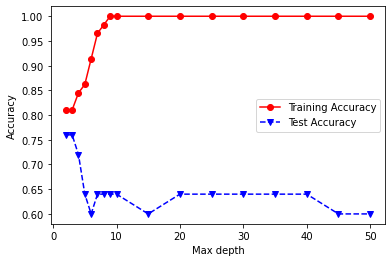

In [4]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]  # 17 different depths

trainAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf2 = tree.DecisionTreeClassifier(max_depth=depth)
    clf2 = clf2.fit(X_train, y_train)
    Y_predTrain = clf2.predict(X_train)
    Y_predTest = clf2.predict(test_x)
    trainAccuracy[index] = accuracy_score(y_train, Y_predTrain)
    testAccuracy[index] = accuracy_score(test_lab, Y_predTest)
    index += 1
    
###########################################################################
# Plot training and test accuracies
##########################################################################
    
plt.plot(maxdepths,trainAccuracy,'ro-',maxdepths,testAccuracy,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [5]:
from sklearn.tree import DecisionTreeClassifier
# As can see from the above plot we choose max_depth=3
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

**Plot the tree structure**

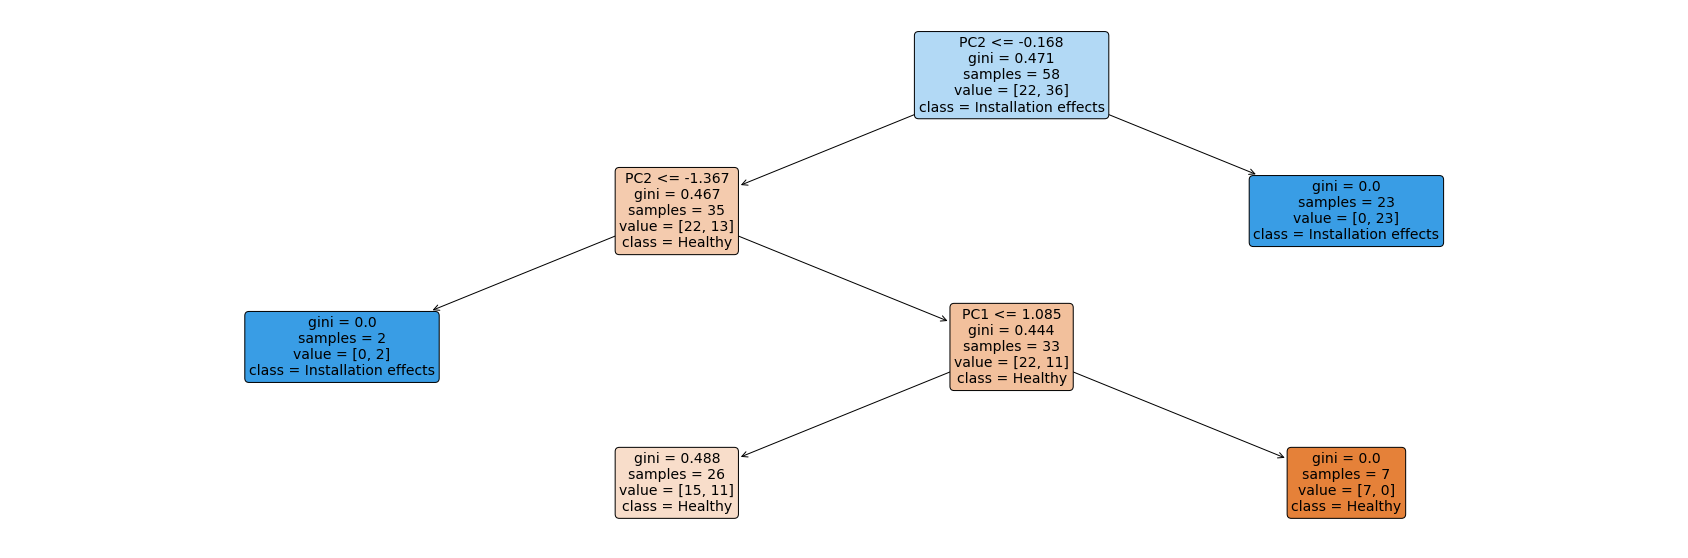

In [6]:
#import relevant packages
from sklearn import tree
import matplotlib.pyplot as plt
#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='w')
#create the tree plot
a = tree.plot_tree(clf,
                   #use the feature names stored
                   feature_names = feature_names,
                   #use the class names stored
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()


In [7]:
# As a text based diagram
#import relevant functions
from sklearn.tree import export_text
#export the decision rules
tree_rules = export_text(clf,
                        feature_names = list(feature_names))
#print the result
print(tree_rules)

|--- PC2 <= -0.17
|   |--- PC2 <= -1.37
|   |   |--- class: Installation effects
|   |--- PC2 >  -1.37
|   |   |--- PC1 <= 1.09
|   |   |   |--- class: Healthy
|   |   |--- PC1 >  1.09
|   |   |   |--- class: Healthy
|--- PC2 >  -0.17
|   |--- class: Installation effects



In [8]:
#predict the class from the test values
test_pred_decision_tree = clf.predict(test_x)

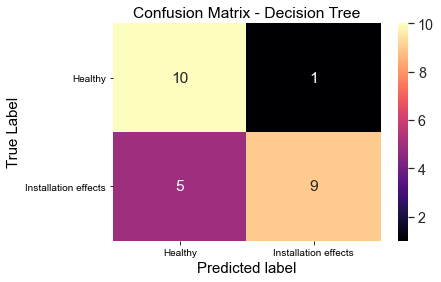

<Figure size 720x504 with 0 Axes>

In [9]:
#import the relevant packages
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_lab,  
                                            test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [10]:
metrics.accuracy_score(test_lab, test_pred_decision_tree)

0.76

In [11]:
print(metrics.classification_report(test_lab,
                                    test_pred_decision_tree))

                      precision    recall  f1-score   support

             Healthy       0.67      0.91      0.77        11
Installation effects       0.90      0.64      0.75        14

            accuracy                           0.76        25
           macro avg       0.78      0.78      0.76        25
        weighted avg       0.80      0.76      0.76        25



# Dataset B

In [12]:
#load in the data

dataframeB = pd.read_csv('../6. Dataset PCA/MeterB_pca_3.csv')
#display(dataframeA.head())
dataframeB.head()

dataframeB = dataframeB.drop('Unnamed: 0', axis=1)

# yLbl is Class Attruibute labels

yLbl_B = dataframeB[['Class Attruibute']]

#featuresVector
dataframeB

,PC1,PC2,PC3,Class Attruibute
0,-0.517006,-2.287902,0.574103,1
1,-0.568945,-2.238254,0.586228,1
2,-0.546921,-2.257404,0.183148,1
3,-0.555591,-2.235918,0.185766,1
4,-0.530154,-2.280878,0.176487,1
...,...,...,...,...
63,-0.612061,1.350095,-0.450270,3
64,-0.583182,1.276827,-0.415164,3
65,-0.685925,1.286320,-0.403708,3
66,-0.756724,1.338792,-0.364639,3


In [13]:
dataframeB['Class Attruibute'] = dataframeB['Class Attruibute'].replace([1],'Healthy')
dataframeB['Class Attruibute'] = dataframeB['Class Attruibute'].replace([2],'Gas injection')
dataframeB['Class Attruibute'] = dataframeB['Class Attruibute'].replace([3],'Waxing')
dataframeB

,PC1,PC2,PC3,Class Attruibute
0,-0.517006,-2.287902,0.574103,Healthy
1,-0.568945,-2.238254,0.586228,Healthy
2,-0.546921,-2.257404,0.183148,Healthy
3,-0.555591,-2.235918,0.185766,Healthy
4,-0.530154,-2.280878,0.176487,Healthy
...,...,...,...,...
63,-0.612061,1.350095,-0.450270,Waxing
64,-0.583182,1.276827,-0.415164,Waxing
65,-0.685925,1.286320,-0.403708,Waxing
66,-0.756724,1.338792,-0.364639,Waxing


In [14]:
#Y = data['Class']
#X = data.drop(['Name','Class'],axis=1)

#clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
#clf = clf.fit(X, Y)

#extract features and target variables
x_B = dataframeB.drop(columns="Class Attruibute")
y_B = dataframeB["Class Attruibute"]
#save the feature name and target variables
feature_names_B = x_B.columns
labels_B = y_B.unique()
labels_B.sort()

#split the dataset
X_train_B, test_x_B, y_train_B, test_lab_B = train_test_split(x_B,y_B,
                                                 test_size = 0.3,
                                                 random_state = 42)

Text(0, 0.5, 'Accuracy')

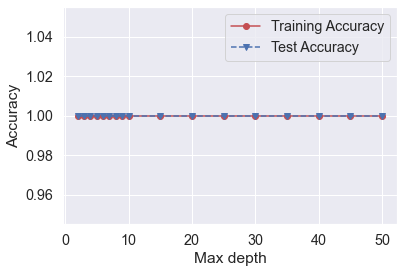

In [15]:
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]  # 17 different depths

trainAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf2 = tree.DecisionTreeClassifier(max_depth=depth)
    clf2 = clf2.fit(X_train_B, y_train_B)
    Y_predTrain = clf2.predict(X_train_B)
    Y_predTest = clf2.predict(test_x_B)
    trainAccuracy[index] = accuracy_score(y_train_B, Y_predTrain)
    testAccuracy[index] = accuracy_score(test_lab_B, Y_predTest)
    index += 1
    
###########################################################################
# Plot training and test accuracies
##########################################################################
    
plt.plot(maxdepths,trainAccuracy,'ro-',maxdepths,testAccuracy,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [16]:
clf_B = DecisionTreeClassifier(max_depth = 4, random_state = 42)
clf_B.fit(X_train_B, y_train_B)

DecisionTreeClassifier(max_depth=4, random_state=42)

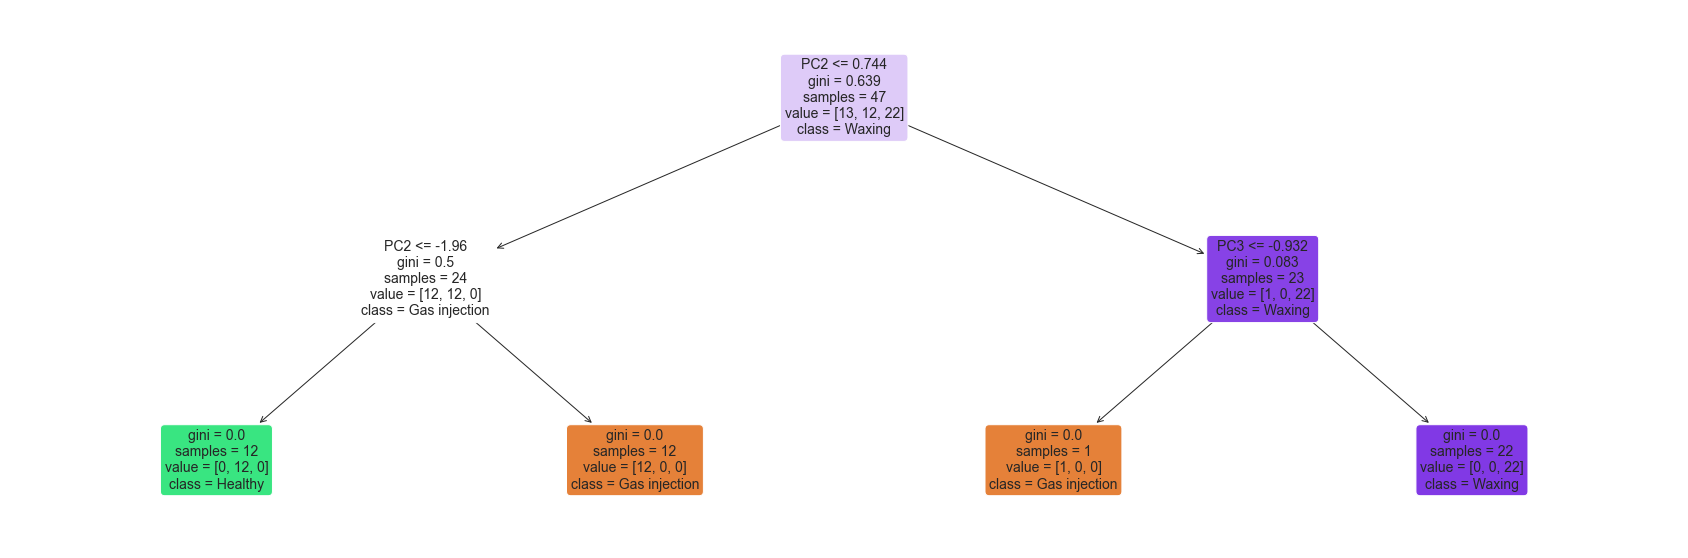

In [17]:
#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='w')
#create the tree plot
a = tree.plot_tree(clf_B,
                   #use the feature names stored
                   feature_names = feature_names_B,
                   #use the class names stored
                   class_names = labels_B,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

In [18]:
# As a text based diagram
#import relevant functions
#export the decision rules
tree_rules_B = export_text(clf_B,
                        feature_names = list(feature_names_B))
#print the result
print(tree_rules_B)

|--- PC2 <= 0.74
|   |--- PC2 <= -1.96
|   |   |--- class: Healthy
|   |--- PC2 >  -1.96
|   |   |--- class: Gas injection
|--- PC2 >  0.74
|   |--- PC3 <= -0.93
|   |   |--- class: Gas injection
|   |--- PC3 >  -0.93
|   |   |--- class: Waxing



In [19]:
#predict the class from the test values
test_pred_decision_tree_B = clf_B.predict(test_x_B)


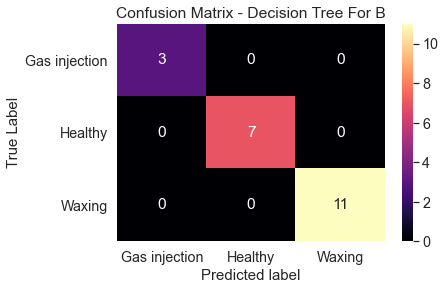

<Figure size 720x504 with 0 Axes>

In [20]:
#get the confusion matrix
confusion_matrix_B = metrics.confusion_matrix(test_lab_B,  
                                            test_pred_decision_tree_B)
#turn this into a dataframe
matrix_df_B = pd.DataFrame(confusion_matrix_B)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df_B, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree For B')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels_B)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels_B), rotation = 0)
plt.show()

In [21]:
metrics.accuracy_score(test_lab_B, test_pred_decision_tree_B)

1.0

In [22]:
# recall_B = metrics.recall_score(test_lab_B, test_pred_decision_tree_B, 
# #                               average =None)
# # recall_results_B = pd.DataFrame(recall_B, index= labels_B)
# # recall_results_B.rename(columns ={0:'Recall For B'}, inplace =True)
# # recall_results_B

In [23]:
print(metrics.classification_report(test_lab_B,
                                    test_pred_decision_tree_B))

               precision    recall  f1-score   support

Gas injection       1.00      1.00      1.00         3
      Healthy       1.00      1.00      1.00         7
       Waxing       1.00      1.00      1.00        11

     accuracy                           1.00        21
    macro avg       1.00      1.00      1.00        21
 weighted avg       1.00      1.00      1.00        21



# Dataset C

In [24]:
#load in the data

dataframeC = pd.read_csv('../6. Dataset PCA/MeterC_pca_3.csv')
#display(dataframeA.head())
dataframeC.head()

dataframeC = dataframeC.drop('Unnamed: 0', axis=1)

# yLbl is Class Attruibute labels

yLbl_C = dataframeC[['Class Attruibute']]

#featuresVector
dataframeC

,PC1,PC2,PC3,Class Attruibute
0,0.002733,0.129016,-1.376022,1
1,-0.058746,0.012368,-1.066123,1
2,-0.059996,-0.001635,-1.054754,1
3,-0.122002,-0.011378,-1.045941,1
4,0.003959,0.028298,-1.073253,1
...,...,...,...,...
147,-0.138944,-0.558095,1.035757,4
148,-0.029921,-0.316254,0.092977,4
149,0.009146,-0.145003,-0.493656,4
150,0.020766,-0.049907,-0.781275,4


In [25]:
dataframeC['Class Attruibute'] = dataframeC['Class Attruibute'].replace([1],'Healthy')
dataframeC['Class Attruibute'] = dataframeC['Class Attruibute'].replace([2],'Gas injection')
dataframeC['Class Attruibute'] = dataframeC['Class Attruibute'].replace([3],'Installation effects')
dataframeC['Class Attruibute'] = dataframeC['Class Attruibute'].replace([4],'Waxing')

dataframeC

,PC1,PC2,PC3,Class Attruibute
0,0.002733,0.129016,-1.376022,Healthy
1,-0.058746,0.012368,-1.066123,Healthy
2,-0.059996,-0.001635,-1.054754,Healthy
3,-0.122002,-0.011378,-1.045941,Healthy
4,0.003959,0.028298,-1.073253,Healthy
...,...,...,...,...
147,-0.138944,-0.558095,1.035757,Waxing
148,-0.029921,-0.316254,0.092977,Waxing
149,0.009146,-0.145003,-0.493656,Waxing
150,0.020766,-0.049907,-0.781275,Waxing


In [26]:
#extract features and target variables
x_C = dataframeC.drop(columns="Class Attruibute")
y_C = dataframeC["Class Attruibute"]
#save the feature name and target variables
feature_names_C = x_C.columns
labels_C = y_C.unique()
labels_C.sort()

X_train_C, test_x_C, y_train_C, test_lab_C = train_test_split(x_C,y_C,
                                                 test_size = 0.3,
                                                 random_state = 20)

print(x_C)

print(y_C)
for i in y_train_C:
    print(i)
print(labels_C)

          PC1       PC2       PC3
0    0.002733  0.129016 -1.376022
1   -0.058746  0.012368 -1.066123
2   -0.059996 -0.001635 -1.054754
3   -0.122002 -0.011378 -1.045941
4    0.003959  0.028298 -1.073253
..        ...       ...       ...
147 -0.138944 -0.558095  1.035757
148 -0.029921 -0.316254  0.092977
149  0.009146 -0.145003 -0.493656
150  0.020766 -0.049907 -0.781275
151  0.135239 -0.044086 -0.776957

[152 rows x 3 columns]
0      Healthy
1      Healthy
2      Healthy
3      Healthy
4      Healthy
        ...   
147     Waxing
148     Waxing
149     Waxing
150     Waxing
151     Waxing
Name: Class Attruibute, Length: 152, dtype: object
Healthy
Healthy
Healthy
Healthy
Gas injection
Healthy
Healthy
Gas injection
Waxing
Healthy
Installation effects
Waxing
Gas injection
Gas injection
Healthy
Healthy
Installation effects
Installation effects
Installation effects
Gas injection
Installation effects
Healthy
Gas injection
Installation effects
Healthy
Healthy
Installation effects
Healthy
Ins

Text(0, 0.5, 'Accuracy')

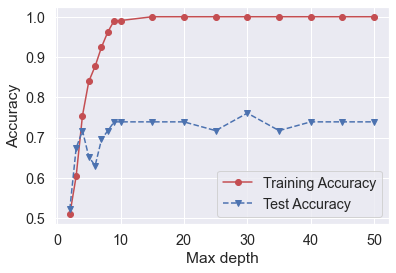

In [27]:
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]  # 17 different depths

trainAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf2 = tree.DecisionTreeClassifier(max_depth=depth)
    clf2 = clf2.fit(X_train_C, y_train_C)
    Y_predTrain = clf2.predict(X_train_C)
    Y_predTest = clf2.predict(test_x_C)
    trainAccuracy[index] = accuracy_score(y_train_C, Y_predTrain)
    testAccuracy[index] = accuracy_score(test_lab_C, Y_predTest)
    index += 1
    
###########################################################################
# Plot training and test accuracies
##########################################################################
    
plt.plot(maxdepths,trainAccuracy,'ro-',maxdepths,testAccuracy,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [28]:
#As can see from the above we choose max_Depth = 6 for highest accuracy 
clf_C = DecisionTreeClassifier(max_depth =7, random_state = 20)
clf_C.fit(X_train_C, y_train_C)

DecisionTreeClassifier(max_depth=7, random_state=20)

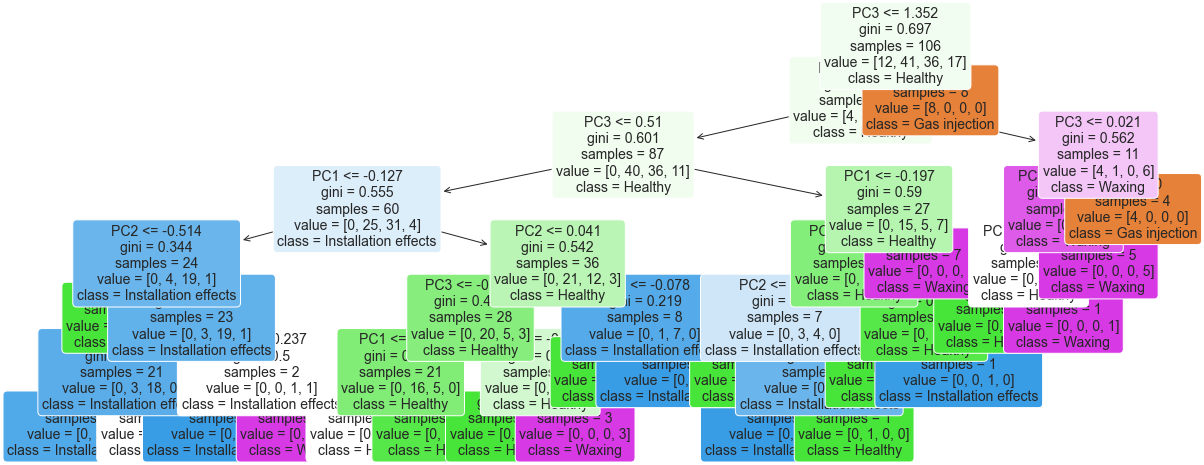

In [29]:
#plt the figure, setting a black background
plt.figure(figsize=(20,8), facecolor ='w')
#create the tree plot
a = tree.plot_tree(clf_C,
                   #use the feature names stored
                   feature_names = feature_names_C,
                   #use the class names stored
                   class_names = labels_C,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
# plt.show()

In [30]:
# As a text based diagram
#export the decision rules
tree_rules_C = export_text(clf_C,
                        feature_names = list(feature_names_C))
#print the result    
print(tree_rules_C)

|--- PC3 <= 1.35
|   |--- PC1 <= 0.08
|   |   |--- PC3 <= 0.51
|   |   |   |--- PC1 <= -0.13
|   |   |   |   |--- PC2 <= -0.51
|   |   |   |   |   |--- class: Healthy
|   |   |   |   |--- PC2 >  -0.51
|   |   |   |   |   |--- PC3 <= 0.50
|   |   |   |   |   |   |--- PC2 <= -0.02
|   |   |   |   |   |   |   |--- class: Installation effects
|   |   |   |   |   |   |--- PC2 >  -0.02
|   |   |   |   |   |   |   |--- class: Healthy
|   |   |   |   |   |--- PC3 >  0.50
|   |   |   |   |   |   |--- PC1 <= -0.24
|   |   |   |   |   |   |   |--- class: Installation effects
|   |   |   |   |   |   |--- PC1 >  -0.24
|   |   |   |   |   |   |   |--- class: Waxing
|   |   |   |--- PC1 >  -0.13
|   |   |   |   |--- PC2 <= 0.04
|   |   |   |   |   |--- PC3 <= -0.79
|   |   |   |   |   |   |--- PC1 <= -0.07
|   |   |   |   |   |   |   |--- class: Healthy
|   |   |   |   |   |   |--- PC1 >  -0.07
|   |   |   |   |   |   |   |--- class: Healthy
|   |   |   |   |   |--- PC3 >  -0.79
|   |   |   |   |   |

In [31]:
#predict the class from the test values
test_pred_decision_tree_C = clf_C.predict(test_x_C)

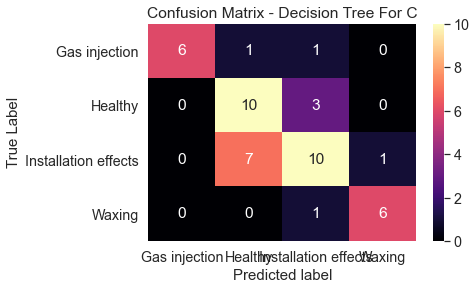

<Figure size 720x576 with 0 Axes>

In [32]:
#get the confusion matrix
confusion_matrix_C = metrics.confusion_matrix(test_lab_C,  
                                            test_pred_decision_tree_C)
#turn this into a dataframe
matrix_df_C = pd.DataFrame(confusion_matrix_C)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,8))
sns.heatmap(matrix_df_C, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree For C')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels_C)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels_C), rotation = 0)
plt.show()

In [33]:
metrics.accuracy_score(test_lab_C, test_pred_decision_tree_C)

0.6956521739130435

In [34]:
# #get the precision score
# precision_C = metrics.precision_score(test_lab_C,
#                                    test_pred_decision_tree_C, 
#                                    average=None)
# #turn it into a dataframe
# precision_results_C = pd.DataFrame(precision_C, index=labels_C)
# #rename the results column
# precision_results_C.rename(columns={0:'precision for C'}, inplace =True)
# precision_results_C

In [35]:
# recall_C = metrics.recall_score(test_lab_C, test_pred_decision_tree_C, 
#                               average =None)
# recall_results_C = pd.DataFrame(recall_C, index= labels_C)
# recall_results_C.rename(columns ={0:'Recall For C'}, inplace =True)
# recall_results_C

In [36]:
print(metrics.classification_report(test_lab_C,
                                    test_pred_decision_tree_C))

                      precision    recall  f1-score   support

       Gas injection       1.00      0.75      0.86         8
             Healthy       0.56      0.77      0.65        13
Installation effects       0.67      0.56      0.61        18
              Waxing       0.86      0.86      0.86         7

            accuracy                           0.70        46
           macro avg       0.77      0.73      0.74        46
        weighted avg       0.72      0.70      0.70        46



In [37]:
#extract importance
importance = pd.DataFrame({'feature': X_train_C.columns, 
'importance' : np.round(clf_C.feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace = True)
print(importance)

  feature  importance
0     PC1       0.505
2     PC3       0.316
1     PC2       0.179
